# About the Numpy Random Library
Numpy is a numerical package for Python which is fundamental for scientific computing. This library contains a multidimensional array object, matrices, masked arrays, an assortment of routines for fast operations on arrays and much more.

It has a subpackage called random, which will be the focus of this notebook.

Documentation for numpy.random can be found [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html).
***
## Contents
#### - Simple Random Data
[rand](#rand)<br>
[randn](#randn)<br>
[randint](#randint)<br>
[random](#random)<br>
[choice](#choice)<br>
#### - Permutations
[shuffle](#shuffle)<br>
[permutation](#permutation)<br>
#### - Distributions
[binomial](#binomial)<br>
[exponential](#exponential)<br>
[logistic](#logistic)<br>
[lognormal](#lognormal)<br>
[normal](#normal)<br>
[power](#power)<br>
[uniform](#uniform)<br>
***

Before we start using any numpy commands, we must first import the package.

In [1]:
import numpy as np

## Simple Random Data
These are the commands that are used to generate simple random data. These will probably be used more than the other types of commands.

### rand
Creates an array of the given shape and populates it with random samples from the "uniform" distribution over [0, 1].

In [2]:
x = np.random.rand(2, 3)
x

array([[0.71354875, 0.41302306, 0.34428931],
       [0.8255839 , 0.27544186, 0.72740924]])

### randn
If parameters are specified, randn returns a sample (or samples) from the “standard normal” distribution over [0, 1].

In [3]:
x = np.random.randn(2, 3)
x

array([[ 0.44672924, -1.02987404, -0.22774946],
       [ 1.60861329,  1.01406118,  0.78794907]])

If no argument is provided then it returns a single float randomly sampled from the distribution.

In [4]:
x = np.random.randn()
x

-2.6865103517145843

### randint
Return random integers from low (inclusive) to high (exclusive).

Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high).<br> 
randint has a number of optional parameters; **high**, **size** and **dtype**. <br>
If **high** is None (the default), then results are from [0, low).

In [5]:
x = np.random.randint(10)
x

9

**size** defines the shape of the output, the default is none which means only one value will be returned. <br>
**dtype** defines the data type of the result, e.g. int, int64, etc.

In [6]:
x = np.random.randint(3, 15, size = 8, dtype="int64")
x

array([ 9,  6,  4, 11, 10,  9, 12,  7], dtype=int64)

### random
Return random floats drawn from the “continuous uniform” distribution over  the half-open interval [0.0, 1.0). <br>Returns a float or an array of floats.

In [7]:
np.random.random(3)

array([0.43193421, 0.19427966, 0.3997069 ])

### choice
Generates a random sample from a given 1-D array. 
Its parameters are **a**, **size**, **replace** and **p**.

**size** defines the output shape. <br>
**a** accepts an int or an ndarray. If **a** is an int, choice draws it's results from 0 (inclusive) to a (exclusive). <br>

In [8]:
np.random.choice(20, 5)

array([19, 16, 15,  1, 13])

If **a** is an ndarray, choice draws its results from the elements in **a**.

In [9]:
np.random.choice((3,9,15,20,27), 5)

array([ 3, 20,  9,  9, 15])

**replace** defines whether the sample data can repeat or not. So if replace=False, then each value will be unique.

In [10]:
np.random.choice((3,9,15,20,27), 5, replace=False)

array([15,  9, 27, 20,  3])

**p** only accepts a 1-D array. It defines the probabilities associated with each entry in **a**. If undefined it assumes a uniform distribution over all entries in **a**.

In [11]:
np.random.choice((3,9,15,20,27), 5, p=[0.2, 0, 0.1, 0.2, 0.5])

array([27, 20,  3, 20, 27])

## Permutations
Permutating is the arranging or rearranging of members of a set into some sequence or order. 

### shuffle
Modify a sequence in-place by shuffling its contents.

In [12]:
x = [0, 1, 2, 3, 4]
np.random.shuffle(x)
x

[2, 0, 1, 4, 3]

This function only shuffles the array along the first axis of a multi-dimensional array. The order of sub-arrays is changed but their contents remains the same.

In [13]:
x = np.arange(16).reshape((4, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [14]:
np.random.shuffle(x)
x

array([[ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [12, 13, 14, 15]])

### permutation
Randomly permute a sequence, or return a permuted range.

This function has one parameter, **x**. If x is a multi-dimensional array, only the first index is shuffled

In [15]:
np.random.permutation([1, 2, 3, 4, 5])

array([2, 5, 4, 3, 1])

Below is a 2D array of numbers between 0 and 19 arranged in order:

In [16]:
x = np.arange(20).reshape((4, 5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

And here is what happens when the permutation command is used on this 2D array:

In [17]:
np.random.permutation(x)

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [ 5,  6,  7,  8,  9],
       [15, 16, 17, 18, 19]])

## Distributions
Distribution functions are used to generate random values drawn from different distribution types. 

In order to display what these functions do on a plot, we need to import matplotlib. More can be read on matplotlib [here](https://matplotlib.org/).

In [18]:
import matplotlib.pyplot as pl

### binomial
Draw samples from a binomial distribution. 

**Parameters: (n, p, size)**

Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where n is an integer >= 0 and p is in the interval [0,1] (n may be input as a float, but it is truncated to an integer in use).

Binomial distibutions is used when there are 2 possible outcomes. An example would be flipping a coin and getting a result of either heads or tails.

In [19]:
x = np.random.binomial(100, 0.5, 10000) # 10,000 coin flips with a probabilty of 0.5 for getting heads or tails

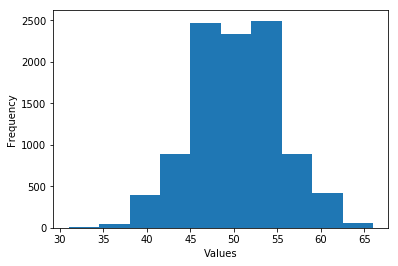

In [20]:
pl.ylabel("Frequency")
pl.xlabel("Values")
pl.hist(x)
pl.show()

### exponential
Draw samples from an exponential distribution.

**Parameters: (scale, size)**

Exponential functions are most often used to estimate the probability of an event happening over time, eg. how long until an earthquake occurs in a given region. 

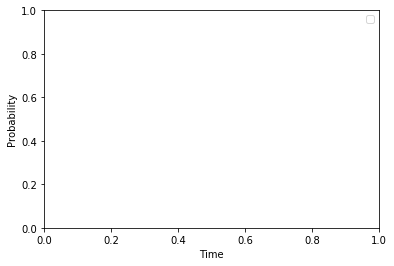

In [22]:
x = np.random.exponential(100, 100)

pl.ylabel("Probability")
pl.xlabel("Time")
pl.legend(x)
pl.show()

### normal
Draw random samples from a normal distribution.

**Parameters: (mean, standard deviation, size)**

The normal distribution, sometimes called the bell curve, is a very common naturally occurring distribution. It can be seen in results of tests, where the average of students get a C while fewer students would get a B or D. An even smaller percentage of students would get an F or A.

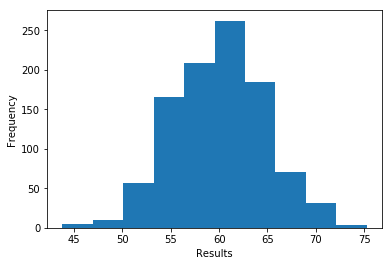

In [37]:
x = np.random.normal(60, 5, 1000)
pl.ylabel("Frequency")
pl.xlabel("Results")
pl.hist(x)
pl.show()

### uniform
Draw samples from a uniform distribution.

**Parameters: (low, high, size) **

A uniform distribution is one that has a constant probability. An example would be rolling a die, where each number has the same probability of being selected as any other.

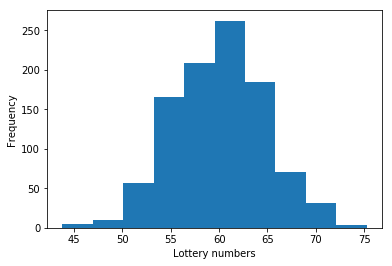

In [38]:
s = np.random.uniform(1, 27, (1000,6))
pl.ylabel("Frequency")
pl.xlabel("Die result")
pl.hist(x)
pl.show()

# Random Generator

### Random State

### seed